<a href="https://colab.research.google.com/github/isllam-colon/Hotel-Booking/blob/main/T4Eslam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
# Load Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
data['target_name'] = data['target'].apply(lambda x: iris.target_names[x])

# Show the head of the dataset
import pandas as pd

# Load the CSV
data = pd.read_csv('final_internship_data.csv')



In [ ]:
data

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21499,tuGgqdGc,Rachel Douglas,Jennifer Collins,Bad,windy,Dense Traffic,2009-08-22 00:25:37.0000003,3.7,2009-08-22 00:25:37,-1.291235,...,8,5,2009,45.003952,35.938500,18.533351,20.983631,13.253413,1.012866,-3.112238
21500,obZ5PSs3,Janet Anderson DVM,Valerie Andrews,Good,windy,Dense Traffic,2010-10-09 17:00:00.000000119,7.3,2010-10-09 17:00:00,0.000000,...,10,5,2010,17293.486312,17360.264559,17314.695444,17339.554005,17334.256605,0.000000,0.000000
21501,gkbyChN2,Ashley Kennedy,Lisa Williams,Very Good,windy,Flow Traffic,2012-08-15 19:59:08.0000004,8.5,2012-08-15 19:59:08,-1.291308,...,8,2,2012,42.901493,33.421032,20.177048,16.925563,8.897963,2.437097,-0.005598
21502,0WGWl8SZ,Robert Richardson,Deborah Smith,Excellent,sunny,Congested Traffic,2013-05-05 18:10:00.00000071,13.0,2013-05-05 18:10:00,-1.291827,...,5,6,2013,40.810365,29.897454,24.339567,10.692936,4.546518,4.538558,-0.887403


In [ ]:
# Check for missing values
print(data.isnull().sum())


User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             0
ewr_dist             0
lga_dist             0
sol_dist             1
nyc_dist             1
distance             1
bearing              1
dtype: int64


In [ ]:
# Count missing values in each column
print(data.isnull().sum())

# See which columns have missing values
missing_cols = data.columns[data.isnull().any()].tolist()
print("Columns with missing values:", missing_cols)


User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             0
ewr_dist             0
lga_dist             0
sol_dist             1
nyc_dist             1
distance             1
bearing              1
dtype: int64
Columns with missing values: ['sol_dist', 'nyc_dist', 'distance', 'bearing']


In [ ]:
data_cleaned = data.dropna()
data[missing_cols] = data[missing_cols].fillna(data.mean(numeric_only=True))
data[missing_cols] = data[missing_cols].fillna(data.median(numeric_only=True))
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].fillna(data[col].mode()[0])
from sklearn.impute import SimpleImputer

# For numeric data
imputer = SimpleImputer(strategy='mean')
data[missing_cols] = imputer.fit_transform(data[missing_cols])


In [ ]:
print(data.isnull().sum().sum())


0


In [ ]:
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")


User ID: 21504 unique values
User Name: 19153 unique values
Driver Name: 19097 unique values
Car Condition: 4 unique values
Weather: 5 unique values
Traffic Condition: 3 unique values
key: 21504 unique values
fare_amount: 503 unique values
pickup_datetime: 21417 unique values
pickup_longitude: 17683 unique values
pickup_latitude: 18463 unique values
dropoff_longitude: 17932 unique values
dropoff_latitude: 18540 unique values
passenger_count: 7 unique values
hour: 24 unique values
day: 31 unique values
month: 12 unique values
weekday: 7 unique values
year: 7 unique values
jfk_dist: 21103 unique values
ewr_dist: 21103 unique values
lga_dist: 21103 unique values
sol_dist: 21103 unique values
nyc_dist: 21103 unique values
distance: 20892 unique values
bearing: 20887 unique values


In [ ]:
for col in data.columns:
    unique_count = data[col].nunique()
    print(f"{col}: {unique_count} unique values")


User ID: 21504 unique values
User Name: 19153 unique values
Driver Name: 19097 unique values
Car Condition: 4 unique values
Weather: 5 unique values
Traffic Condition: 3 unique values
key: 21504 unique values
fare_amount: 503 unique values
pickup_datetime: 21417 unique values
pickup_longitude: 17683 unique values
pickup_latitude: 18463 unique values
dropoff_longitude: 17932 unique values
dropoff_latitude: 18540 unique values
passenger_count: 7 unique values
hour: 24 unique values
day: 31 unique values
month: 12 unique values
weekday: 7 unique values
year: 7 unique values
jfk_dist: 21103 unique values
ewr_dist: 21103 unique values
lga_dist: 21103 unique values
sol_dist: 21103 unique values
nyc_dist: 21103 unique values
distance: 20892 unique values
bearing: 20887 unique values


In [ ]:
data = data.drop(columns=[col for col in ['User ID', 'User Name', 'Driver Name', 'key', 'pickup_datetime'] if col in data.columns])


In [ ]:
data = pd.get_dummies(data, columns=['Car Condition', 'Weather', 'Traffic Condition'], drop_first=True)


In [ ]:
X = data.drop('fare_amount', axis=1)
y = data['fare_amount']


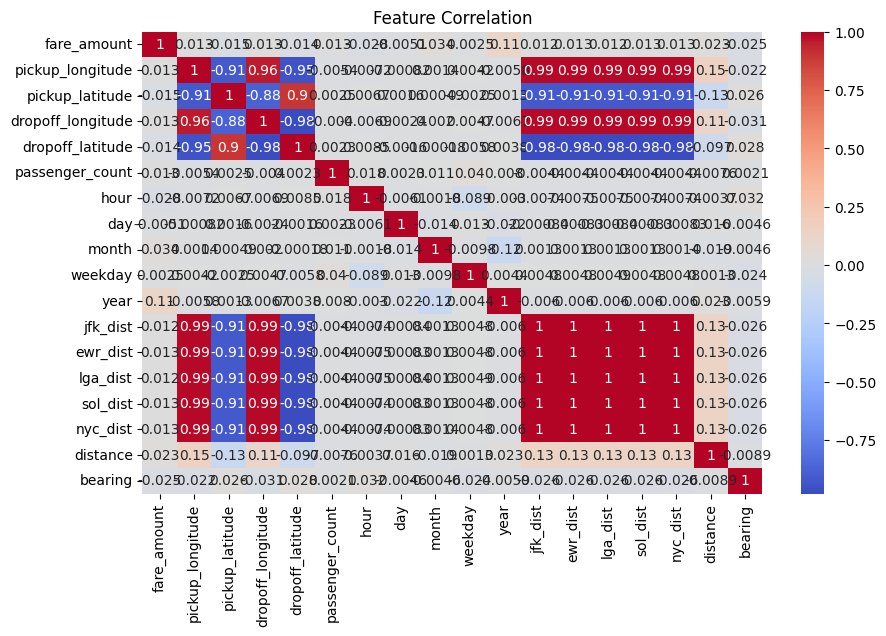

In [ ]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [ ]:
# Summary statistics
print(data.describe())

        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  21504.000000      21504.000000     21504.000000       21504.000000   
mean      11.339931         -1.265042         0.696748          -1.265282   
std        9.618236          0.183571         0.116047           0.182722   
min       -3.000000         -1.303583        -1.291664          -1.477495   
25%        6.000000         -1.291406         0.710956          -1.291390   
50%        8.500000         -1.291224         0.711270          -1.291198   
75%       12.500000         -1.290966         0.711527          -1.290909   
max      180.000000          0.711503         7.000225           0.712137   

       dropoff_latitude  passenger_count          hour           day  \
count      21504.000000     21504.000000  21504.000000  21504.000000   
mean           0.696593         1.658250     13.485026     15.675084   
std            0.107382         1.282159      6.527157      8.683073   
min           -1.2

In [ ]:
from sklearn.preprocessing import StandardScaler

X = data.drop('fare_amount', axis=1)
y = data['fare_amount']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


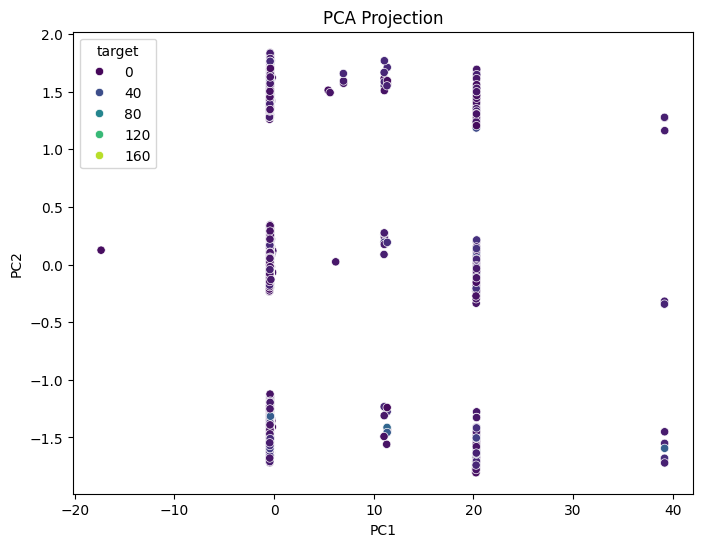

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA DataFrame
pca_data = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_data['target'] = y  # y is fare_amount or your target column

# Plot PCA result (color by target if regression, optional)
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_data, palette='viridis')
plt.title("PCA Projection")
plt.show()


In [ ]:
print(data.columns.tolist())


['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance', 'bearing', 'Car Condition_Excellent', 'Car Condition_Good', 'Car Condition_Very Good', 'Weather_rainy', 'Weather_stormy', 'Weather_sunny', 'Weather_windy', 'Traffic Condition_Dense Traffic', 'Traffic Condition_Flow Traffic']


In [ ]:
# Create target from one-hot encoded car condition columns
condition_cols = ['Car Condition_Excellent', 'Car Condition_Good', 'Car Condition_Very Good']
data['Car_Condition'] = data[condition_cols].idxmax(axis=1)  # Will give column name as class

# Optional: convert to simpler labels
data['Car_Condition'] = data['Car_Condition'].str.replace('Car Condition_', '')

# Now split data
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, data['Car_Condition'], test_size=0.2, random_state=42)

# Train SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[2124    0    0]
 [1089    0    0]
 [1088    0    0]]

Classification Report:
               precision    recall  f1-score   support

   Excellent       0.49      1.00      0.66      2124
        Good       0.00      0.00      0.00      1089
   Very Good       0.00      0.00      0.00      1088

    accuracy                           0.49      4301
   macro avg       0.16      0.33      0.22      4301
weighted avg       0.24      0.49      0.33      4301



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


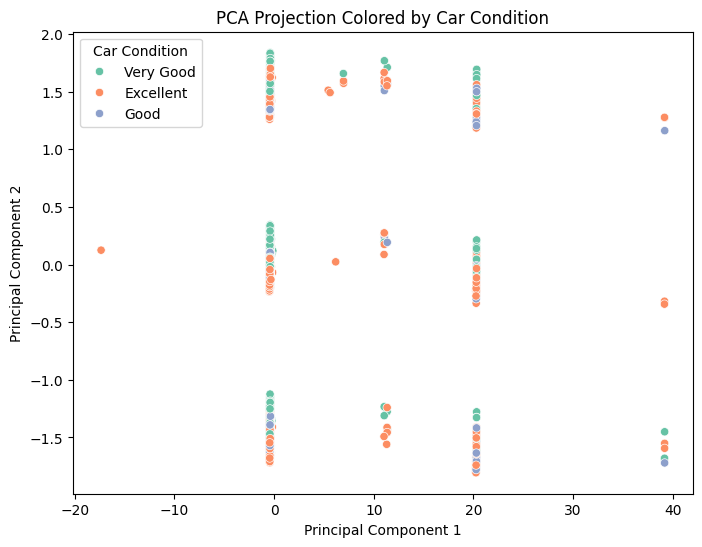

In [ ]:
# Recover Car_Condition labels from one-hot
car_condition_cols = ['Car Condition_Excellent', 'Car Condition_Good', 'Car Condition_Very Good']
data['Car_Condition'] = data[car_condition_cols].idxmax(axis=1).str.replace('Car Condition_', '')

# Create PCA DataFrame
pca_data = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_data['Car_Condition'] = data['Car_Condition'].values

# Plot PCA with corrected hue
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Car_Condition', data=pca_data, palette='Set2')
plt.title("PCA Projection Colored by Car Condition")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Car Condition')
plt.show()


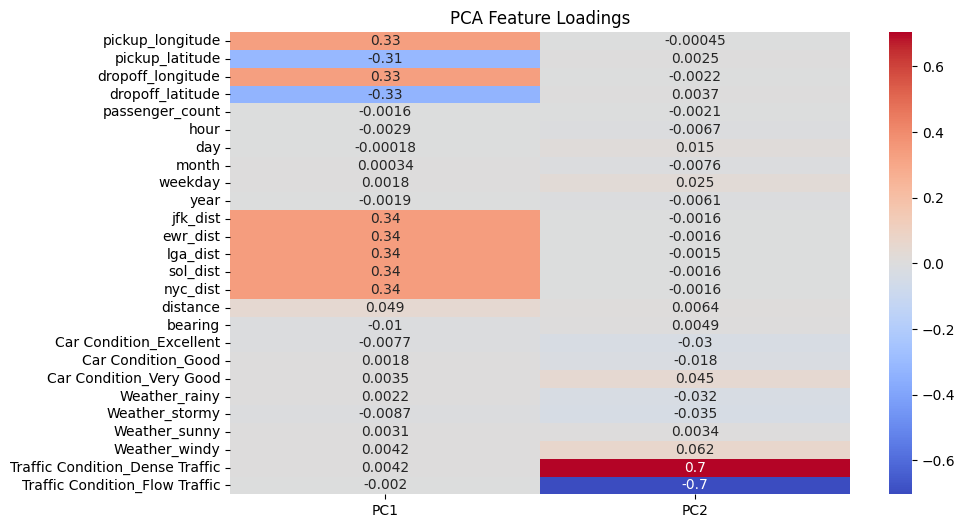

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
plt.figure(figsize=(10,6))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title("PCA Feature Loadings")
plt.show()


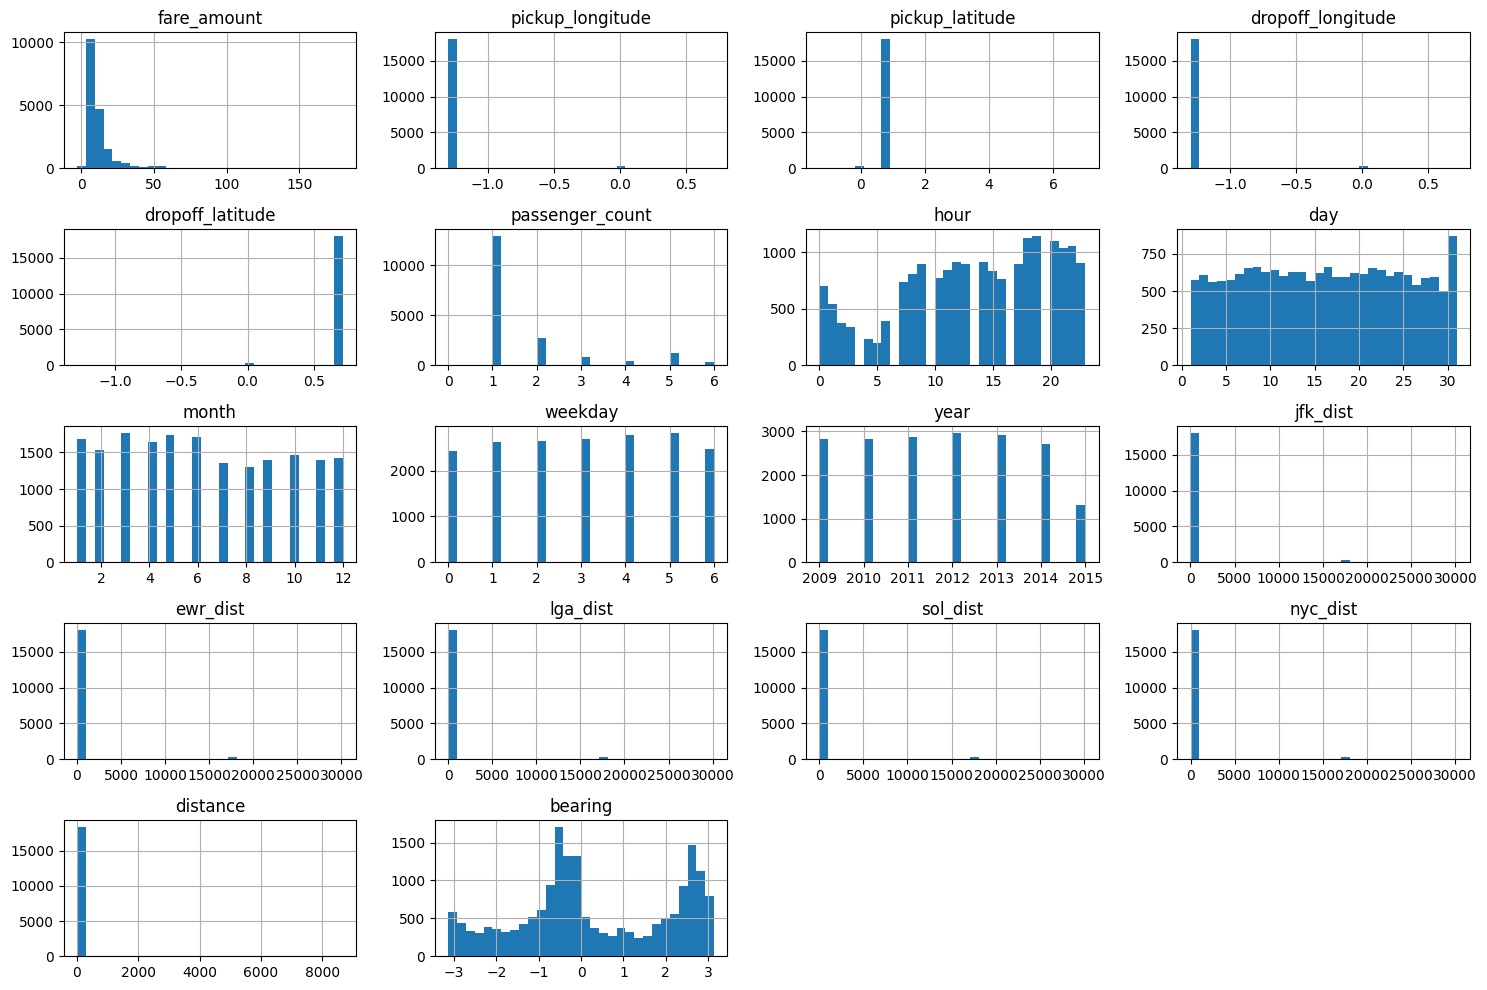

In [7]:
numerical = data.select_dtypes(include=['float64', 'int64'])
numerical.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

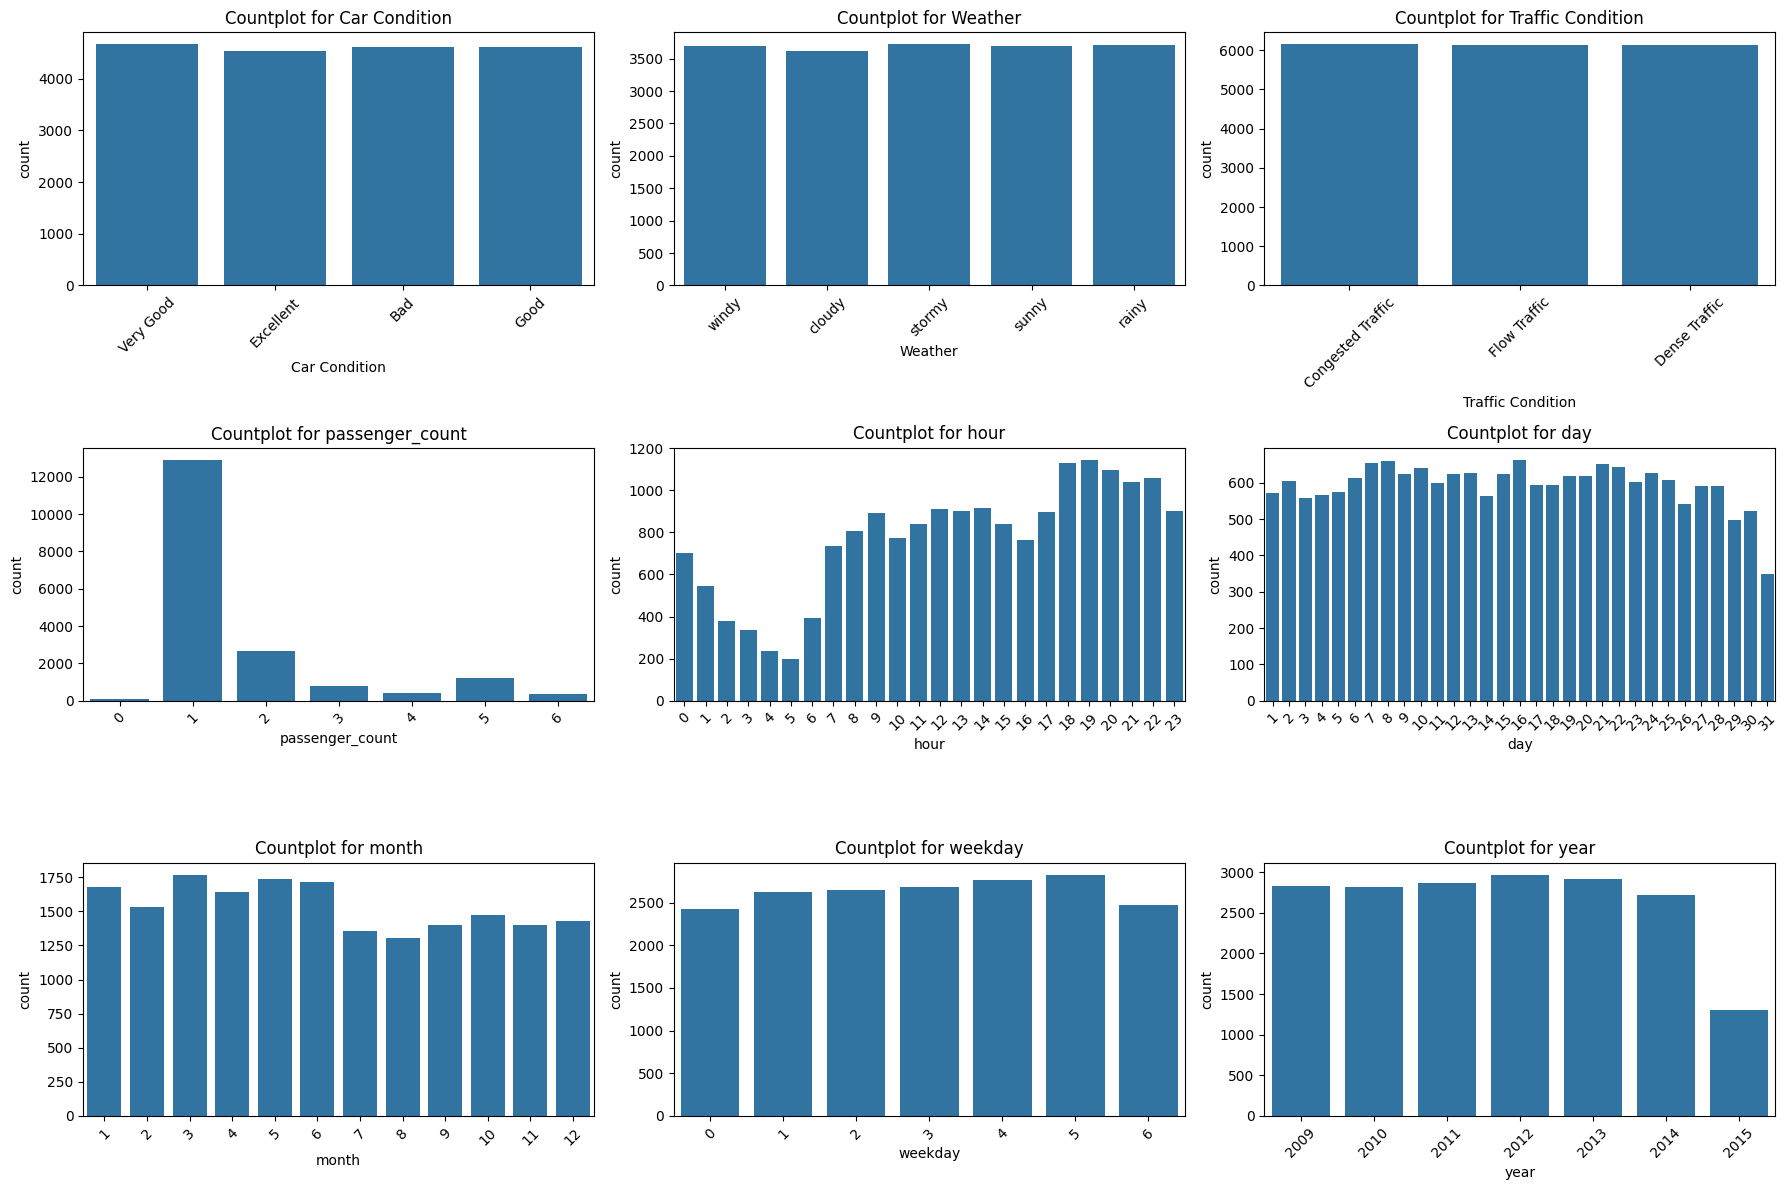

In [9]:
cols = ['Car Condition', 'Weather', 'Traffic Condition', 'passenger_count', 'hour', 'day', 'month', 'weekday', 'year']
n_cols = 3
n_rows = -(-len(cols) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, data=data, ax=axes[i])
    axes[i].set_title(f"Countplot for {col}")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()